In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import load_boston
boston = load_boston()
print(boston.data.shape)
print(boston.feature_names)
print(boston.DESCR)

(506, 13)
['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']
Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX   

In [2]:
boston_table = pd.DataFrame(boston.data)
boston_table.columns = boston.feature_names
boston_table['MEDV'] = boston.target
print(boston_table.head())
print(boston_table.describe())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  MEDV  
0     15.3  396.90   4.98  24.0  
1     17.8  396.90   9.14  21.6  
2     17.8  392.83   4.03  34.7  
3     18.7  394.63   2.94  33.4  
4     18.7  396.90   5.33  36.2  
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.593761   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.596783   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    

(404, 13)
(102, 13)
(404,)
(102,)
Coefficients: [-1.30297070e-01  4.93739220e-02  1.52699792e-03  2.70755661e+00
 -1.60074619e+01  3.40741645e+00  1.18339212e-03 -1.49381089e+00
  3.64266500e-01 -1.31647943e-02 -9.53457936e-01  1.18685182e-02
 -5.94883957e-01]
Mean squared error: 20.902843680372428


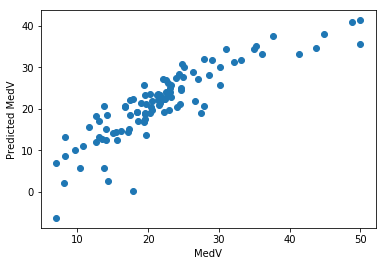

In [3]:
from sklearn.model_selection import train_test_split

# Y = Boston Housing Price; X = all other features
X = boston_table.drop(columns=['MEDV'])
Y = boston_table['MEDV']

boston_table = (boston_table - boston_table.mean())/boston_table.std()

X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape) 

from sklearn.linear_model import LinearRegression

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression(normalize=True)

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")
# Plot outputs
# plt.plot(X_test, Y_pred, color='red',linewidth=3)

print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

In [4]:
pd.DataFrame(list(zip(boston_table.columns, linear_reg.coef_)), columns=['feature', 'coefficient'])

,feature,coefficient
0,CRIM,-0.130297
1,ZN,0.049374
2,INDUS,0.001527
3,CHAS,2.707557
4,NOX,-16.007462
5,RM,3.407416
6,AGE,0.001183
7,DIS,-1.493811
8,RAD,0.364266
9,TAX,-0.013165


(404, 3)
(102, 3)
(404,)
(102,)
(404, 13)
(102, 13)
(404,)
(102,)


,feature,coefficient
0,CRIM,-0.121792
1,ZN,0.125205
2,INDUS,0.001139
3,CHAS,0.074774
4,NOX,-0.201684
5,RM,0.260311
6,AGE,0.003622
7,DIS,-0.342013
8,RAD,0.344865
9,TAX,-0.241245


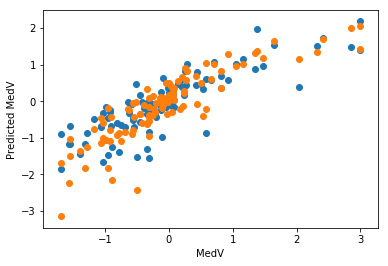

In [15]:
from sklearn.model_selection import train_test_split

# Y = Boston Housing Price; X = CHAS, NOX, RM
X_3 = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y_3 = boston_table['MEDV']


X_3_train, X_3_test, Y_3_train, Y_3_test = sklearn.model_selection.train_test_split(X_3, Y_3, test_size = 0.2, random_state = 5)
print(X_3_train.shape)
print(X_3_test.shape) 
print(Y_3_train.shape) 
print(Y_3_test.shape) 

from sklearn.linear_model import LinearRegression

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg_3 = LinearRegression(normalize=True)

# Train the model using the training sets
linear_reg_3.fit(X_3_train, Y_3_train)

# Make predictions using the testing set
Y_3_pred = linear_reg_3.predict(X_3_test)

plt.scatter(Y_3_test, Y_3_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")

pd.DataFrame(list(zip(boston_table.columns, linear_reg_3.coef_)), columns=['feature', 'coefficient'])




# Y = Boston Housing Price; X = all other features
X = boston_table.drop(columns=['MEDV'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)
print(X_train.shape)
print(X_test.shape) 
print(Y_train.shape) 
print(Y_test.shape) 

from sklearn.linear_model import LinearRegression

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression(normalize=True)

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")

pd.DataFrame(list(zip(boston_table.columns, linear_reg.coef_)), columns=['feature', 'coefficient'])

In [16]:
errors = {}
for feature in boston.feature_names:
    linear_reg = LinearRegression()
    linear_reg.fit(X[[feature]], Y)
    mean_squared_error = np.mean((Y - linear_reg.predict(X[[feature]])) ** 2)
    errors[feature] = mean_squared_error
errors = sorted(errors.items(), key=lambda x: x[1])
print("Features that Minimize Error")
print(30 * "-")
for e in errors:
    print(e[0], "\t", e[1])

Features that Minimize Error
------------------------------
LSTAT 	 0.454952805768434
RM 	 0.5154538433288066
PTRATIO 	 0.7406859770856566
INDUS 	 0.7644961158607507
TAX 	 0.7789316400645635
NOX 	 0.815781548491387
CRIM 	 0.8494518242609449
RAD 	 0.8526729587831531
AGE 	 0.8562097909895424
ZN 	 0.868359631083762
B 	 0.8870473523430564
DIS 	 0.9356827906689714
CHAS 	 0.967368289519898


Coefficients: [-0.76077157]
Mean squared error: 0.4589588928940983


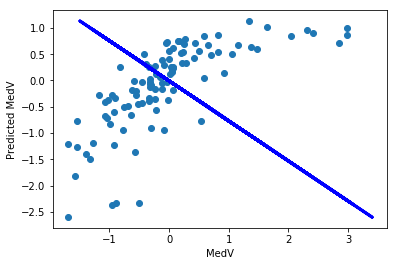

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = LSTAT
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")

print('Coefficients:', linear_reg.coef_)
plt.plot(X_test, Y_pred, color='blue', linewidth=3)


mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [-0.43512104]
Mean squared error: 0.7580655813304066


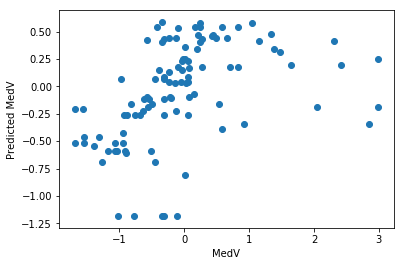

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = NOX
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'CHAS', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
 'B', 'LSTAT'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")


print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

Coefficients: [0.16446441]
Mean squared error: 0.8849929916515332


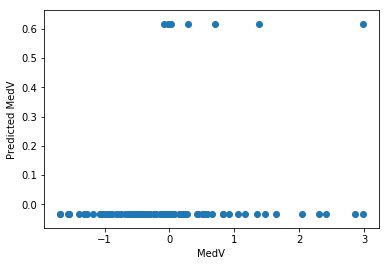

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Y = Boston Housing Price; X = CHAS
X = boston_table.drop(columns=['MEDV','CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
'B', 'LSTAT'])
Y = boston_table['MEDV']


X_train, X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X, Y, test_size = 0.2, random_state = 5)

# Create linear regression object
# LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
linear_reg = LinearRegression()

# Train the model using the training sets
linear_reg.fit(X_train, Y_train)

# Make predictions using the testing set
Y_pred = linear_reg.predict(X_test)

plt.scatter(Y_test, Y_pred)
plt.xlabel("MedV")
plt.ylabel("Predicted MedV")


print('Coefficients:', linear_reg.coef_)

mse = sklearn.metrics.mean_squared_error(Y_test, Y_pred)
print('Mean squared error:', mse)

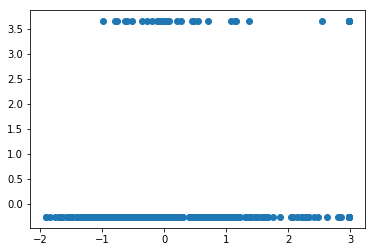

In [10]:
plt.scatter(boston_table.MEDV, boston_table.CHAS)